<a href="https://colab.research.google.com/github/issarbhavya/machine_learning_projects/blob/main/coral_differentiation_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 171MB/s]
2023-09-22 06:23:15.004698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 06:23:15.902580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 53.3MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 138.6ms
Speed: 0.8ms pre-process, 138.6ms inference, 444.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content


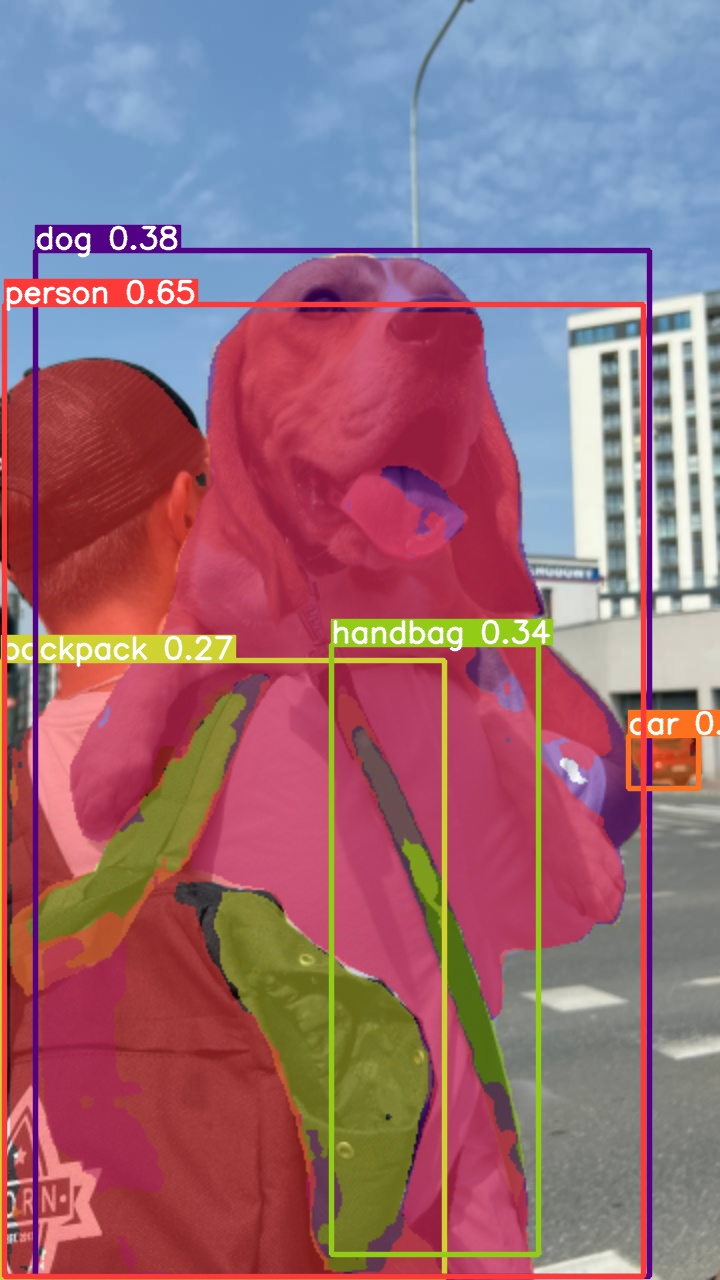

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

# now if i want a personalised image to test, i can add it to the colab and check it

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/WhatsApp Image 2023-09-22 at 11.55.47.jpg' save=true

/content
2023-09-22 06:28:18.901932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 06:28:19.830531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

image 1/1 /content/WhatsApp Image 2023-09-22 at 11.55.47.jpg: 640x480 2 persons, 1 bottle, 1 laptop, 1 mouse, 166.4ms
Speed: 0.8ms pre-process, 166.4ms inference, 161.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


/content


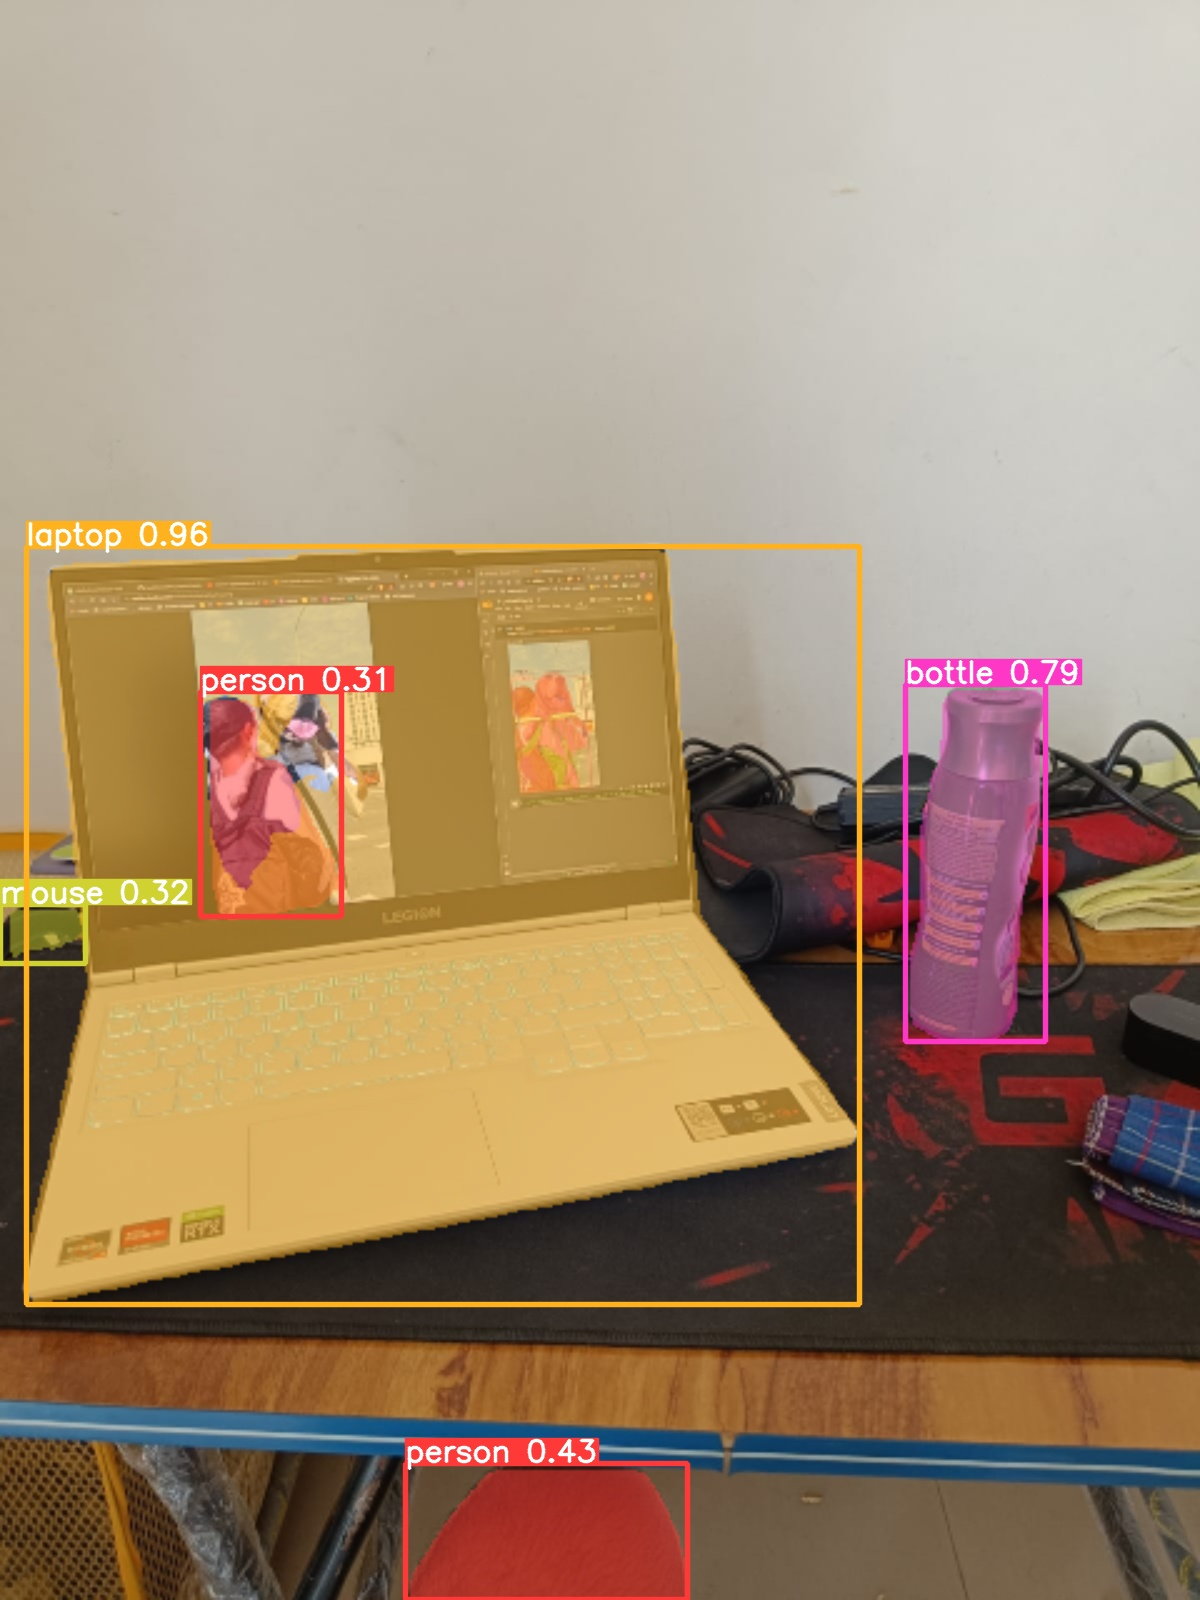

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict2/WhatsApp Image 2023-09-22 at 11.55.47.jpg', height=600)

# Instance Segmentation


 Semantic segmentation cannot distinguish between different instances in the same category, i.e. all chairs are marked blue. 2. Example: Instance segmentation can distinguish between different instances of the same categories, i.e. different chairs are distinguished by different colours.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


a directory is added to put the entire dataset into that particular directory for easier working

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EgTI2QJev4OLuUabJiH1")
project = rf.workspace("lini-foundation").project("lini-coral-forms-3.0")
dataset = project.version(10).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to LINI-Coral-Forms-3.0-10 in yolov8:: 100%|██████████| 470/470 [00:00<00:00, 5847.14it/s]


# custom training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/LINI-Coral-Forms-3.0-10/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
confusion_matrix.png				     val_batch0_labels.jpg
events.out.tfevents.1695365173.a120c0620cdb.10807.0  val_batch0_pred.jpg
MaskF1_curve.png				     val_batch1_labels.jpg
MaskP_curve.png					     val_batch1_pred.jpg
MaskPR_curve.png				     weights
MaskR_curve.png


benefit of using this method of training is that, it returns all the requirements in the train folder to check the model's performance accordingly

/content


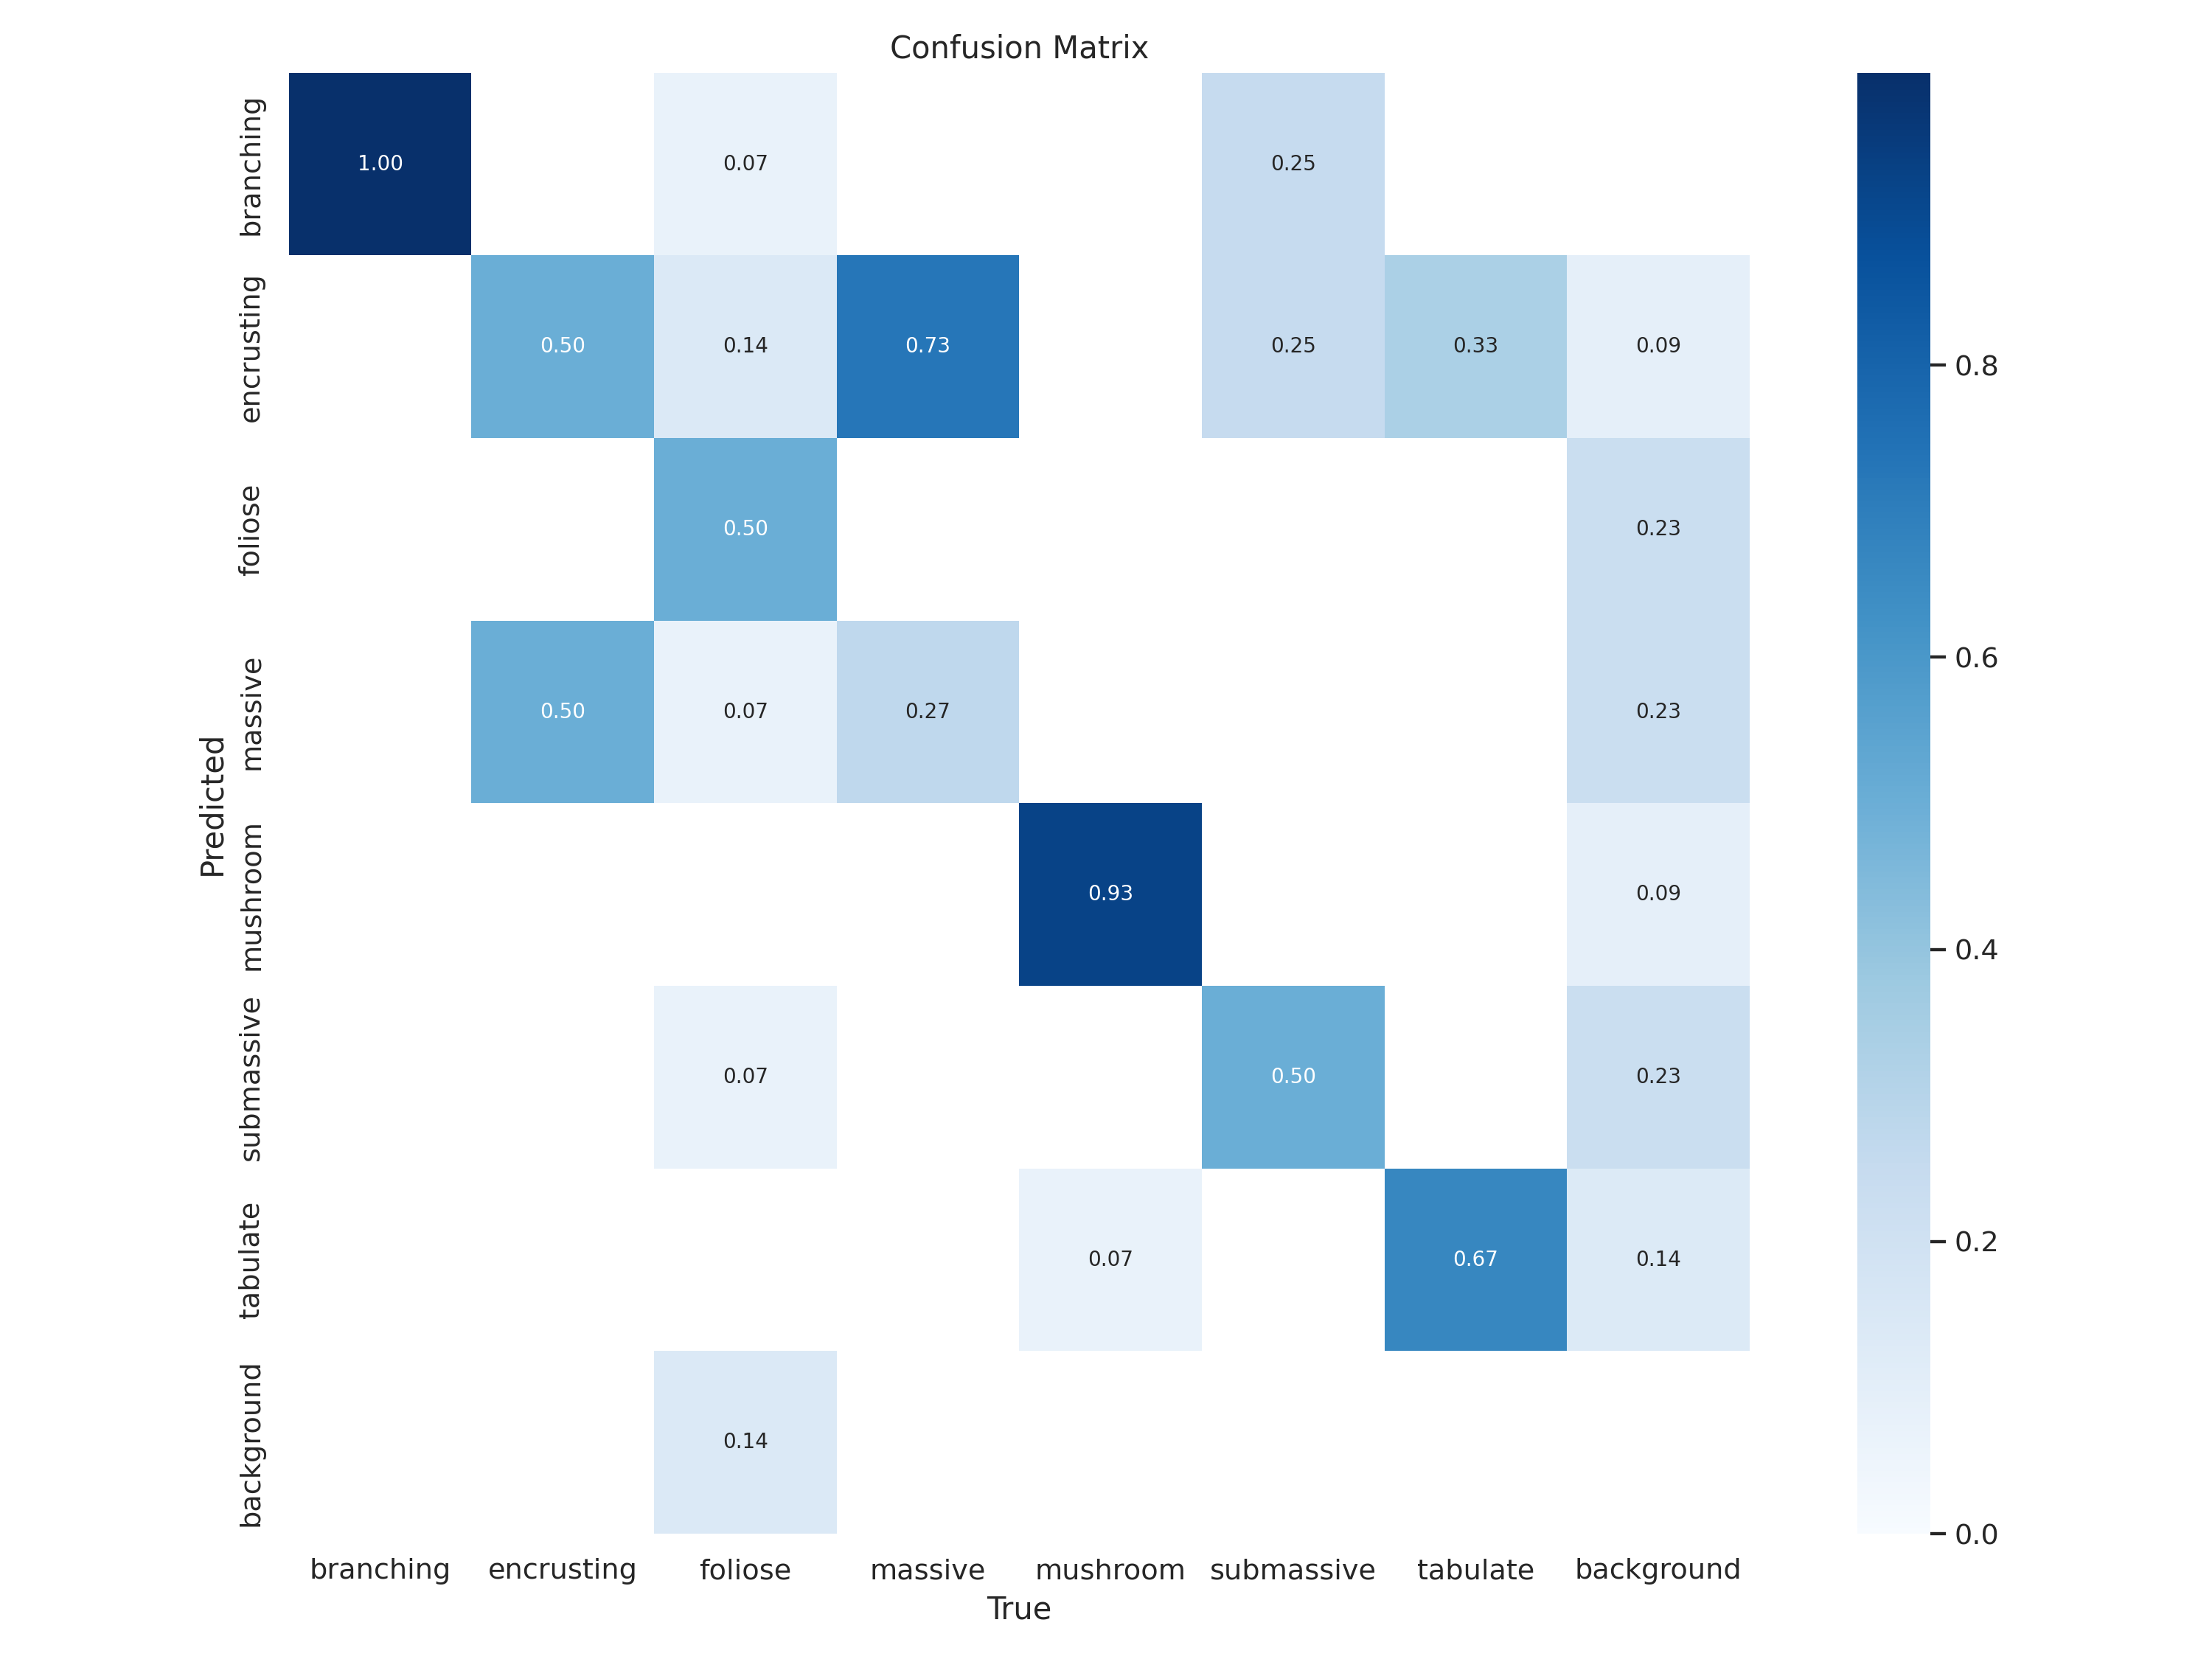

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


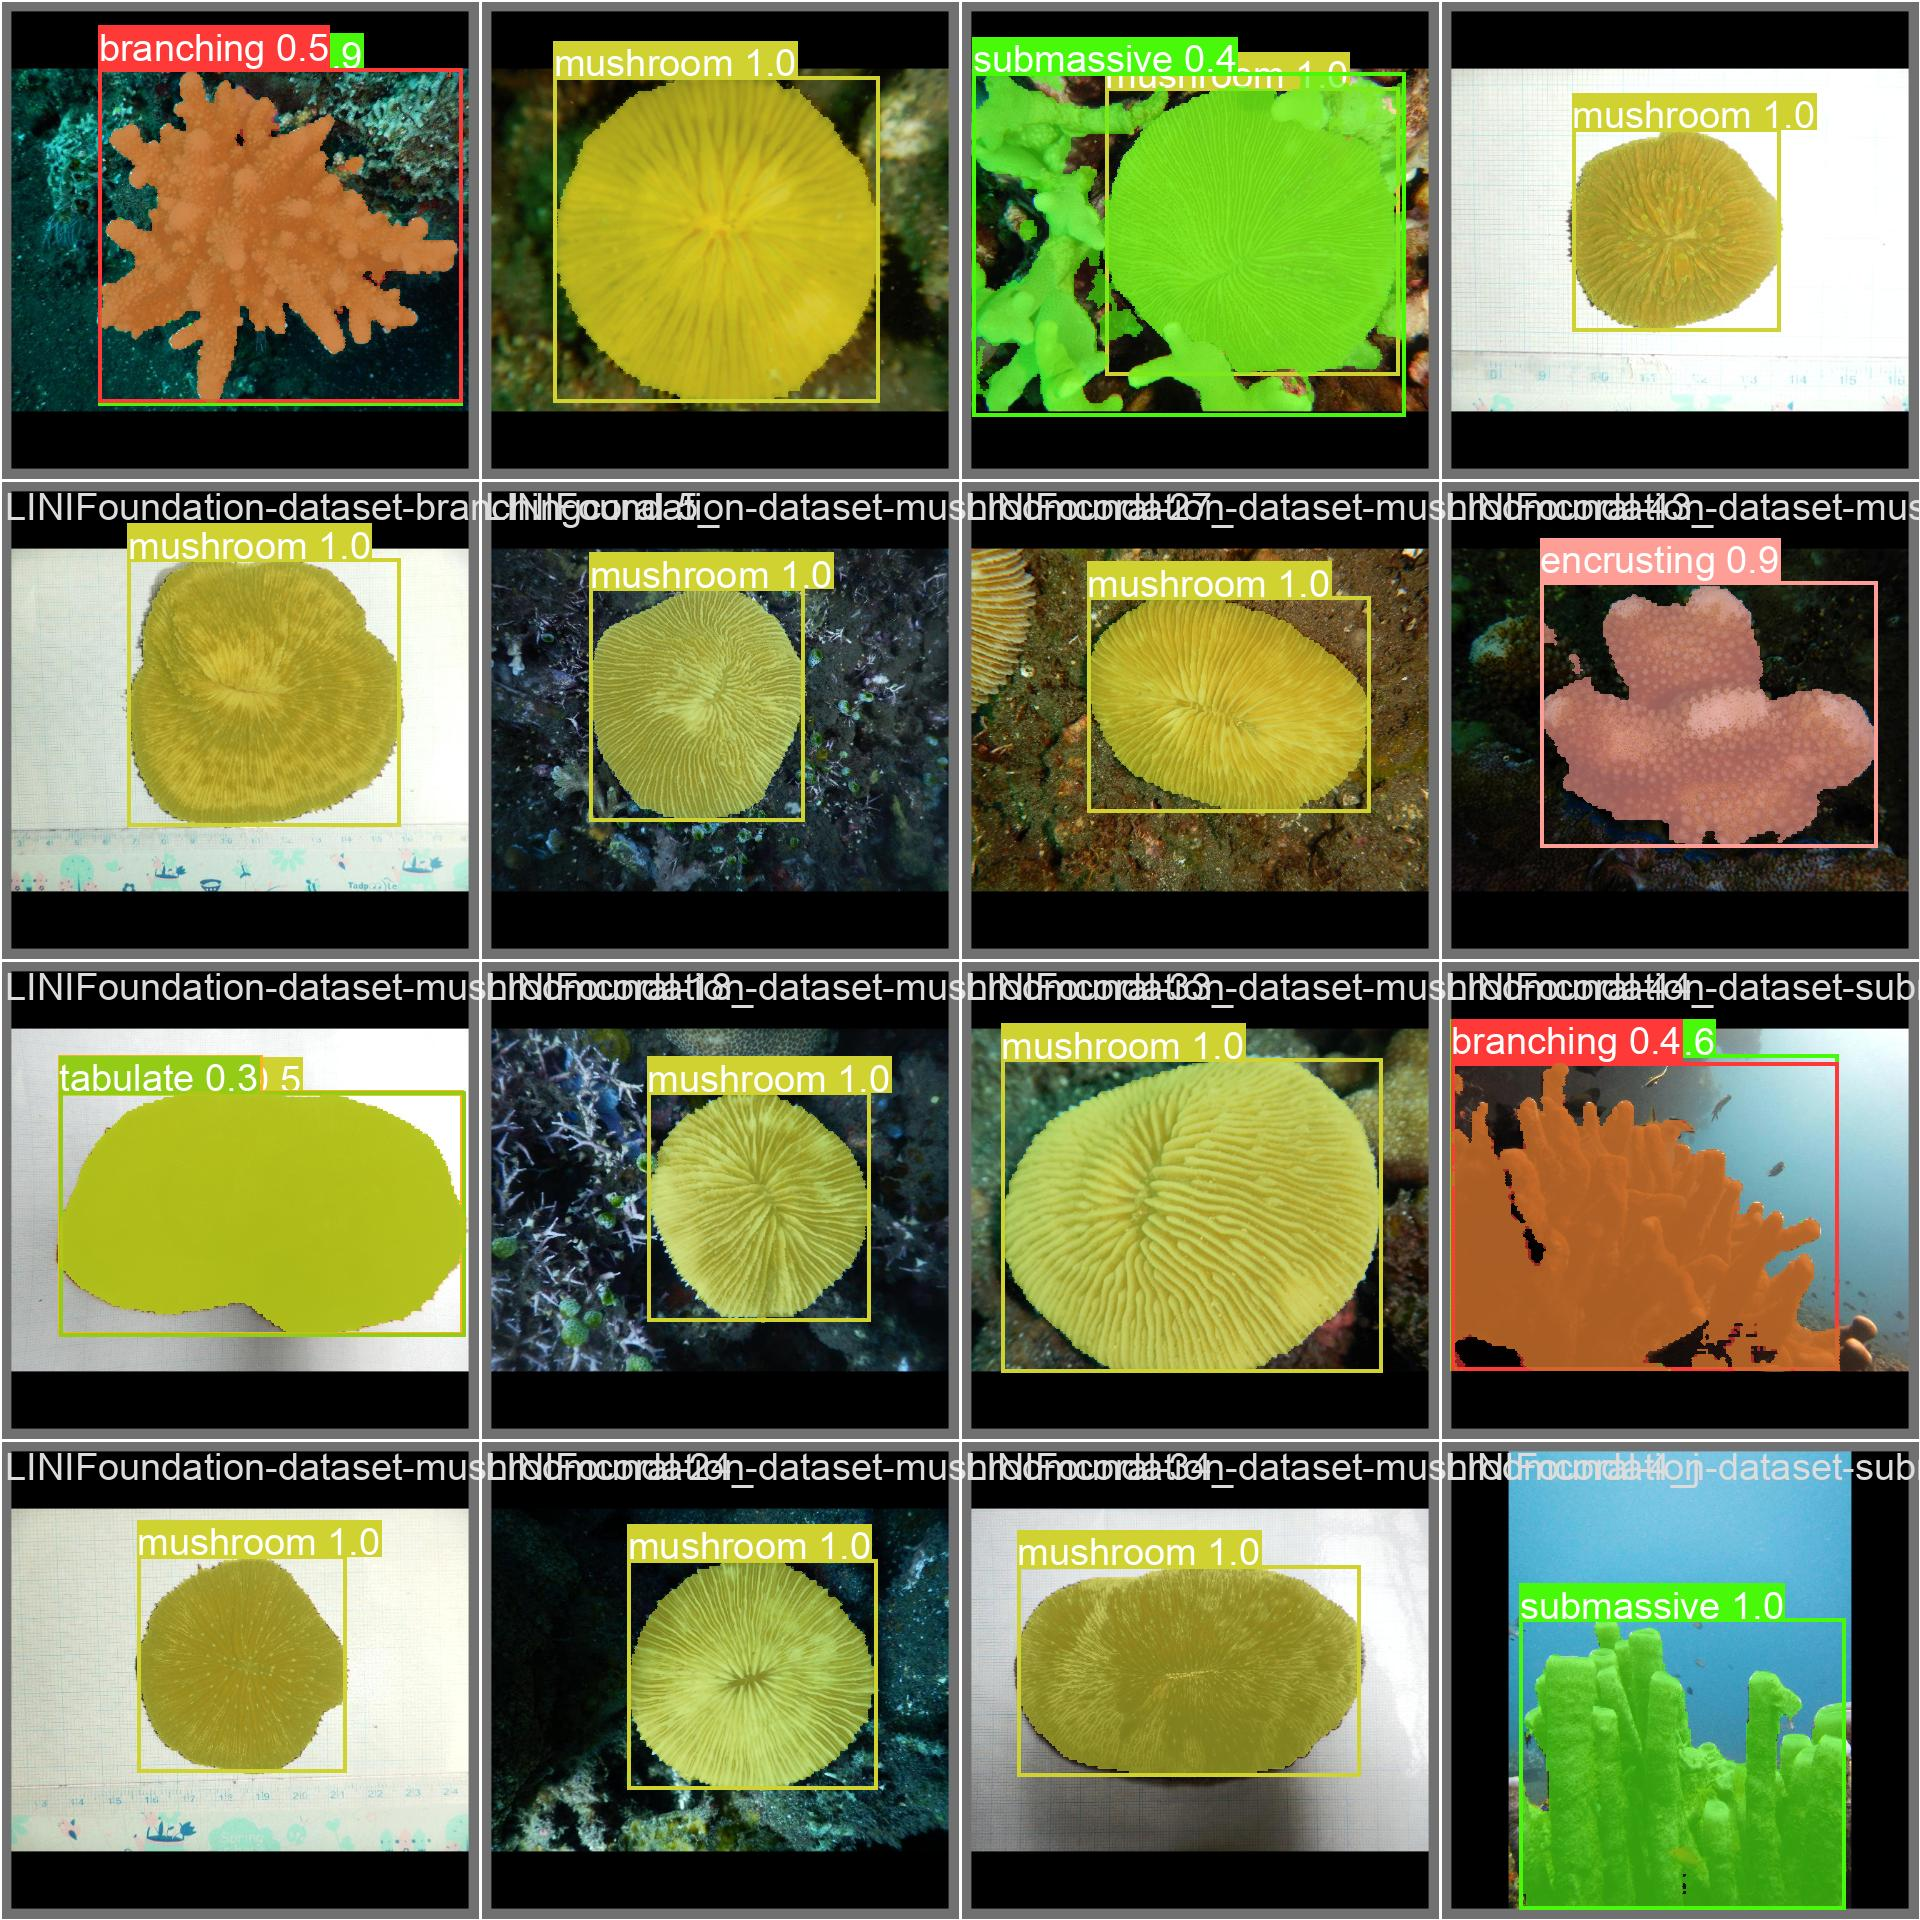

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)



# validating custom model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-22 06:52:50.915850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 06:52:51.802854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/LINI-Coral-Forms-3.0-10/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.00it/s]
                   all         50         53      0.644      0.788    

* task=segment: This suggests that the
YOLO algorithm is being used for a segmentation task, where the goal is to segment objects or regions within an image.


* mode=val: This could indicate that the YOLO model is being used in validation mode, which typically means that it is evaluating the model's performance on a validation dataset.


* model={HOME}/runs/segment/train/weights/best.pt: This specifies the path to a YOLO model checkpoint file (weights) located in a directory structure under the home directory ({HOME}). The best.pt file likely contains the trained model's weights.


* data={dataset.location}/data.yaml: This specifies the path to a data configuration file (in YAML format) for the YOLO task.This configuration file would typically contain information about the dataset used for training or validation, such as file paths, class labels, and other settings.

# interfence with custom model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-09-22 06:54:05.017836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 06:54:05.912425: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs

image 1/15 /content/datasets/LINI-Coral-Forms-3.0-10/test/images/LINIFoundation-dataset-branchingcoral-12_jpg.rf.f372cbb963a852d4f22b4a9fbe0ed5aa.jpg: 640x640 20.5ms
image 2/15 /content/datasets/LINI-Coral-Forms-3.0-10/test/images/LINIFoundation-dataset-branchingcoral-13_jpg.rf.235eef47bbfa0b35fea5c8bf7a2b6a8d.jpg: 640x640 1 submassive, 21.5ms
image 3/15 /content/datasets/LINI-

just like the above one, here's jonly one major difference,

mode=predict: This indicates that the YOLO model is being used in prediction mode, likely for generating segmentations on new, unseen data.



---


Now displaying some of the images from the following prediction made through the above model,


 mode = predict

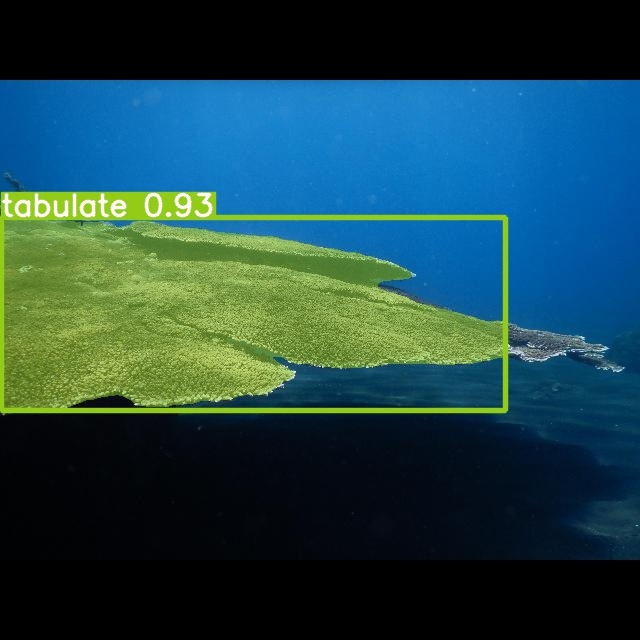

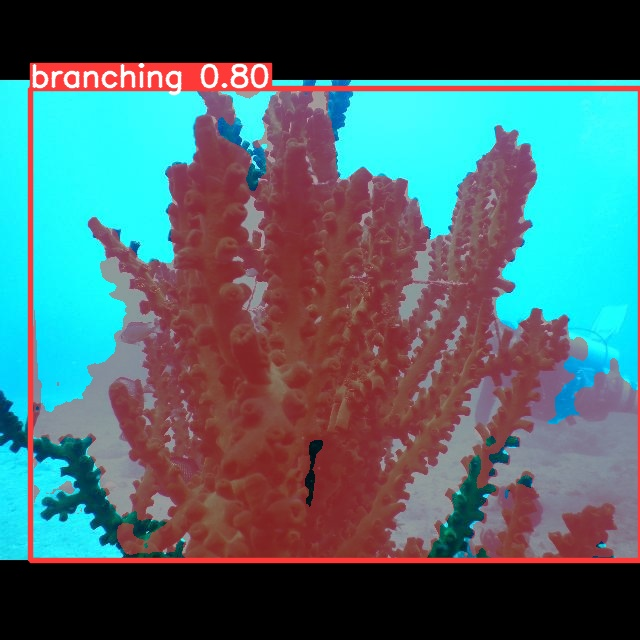

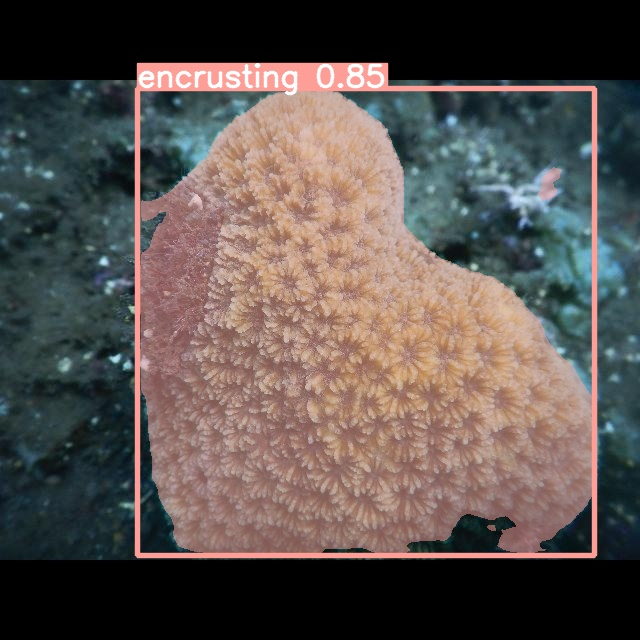

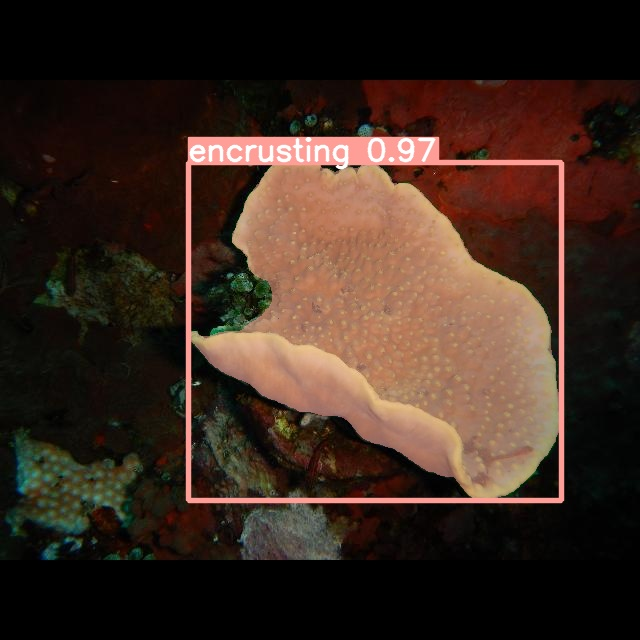

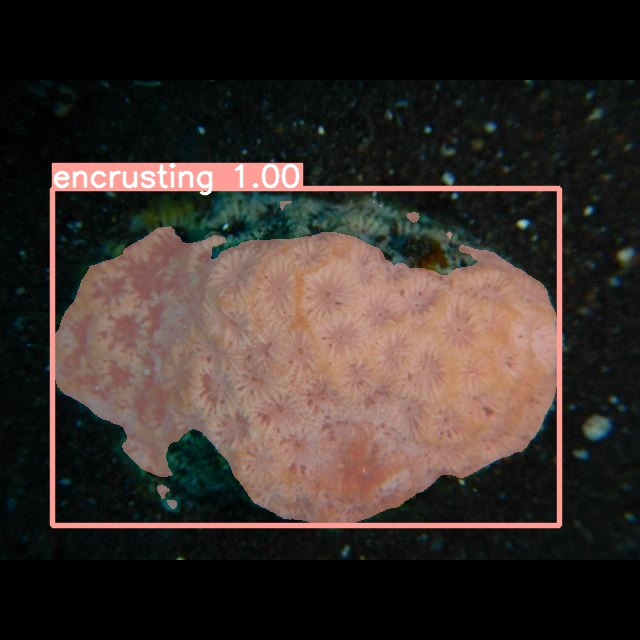

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")